Credit card data  


Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Hi all this is my first submission and it's a quite simple approach to creating a logistic regression for this problem :)

In [1]:
#Importing the libraries to be used
import pandas as pd 
import numpy as np 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
#Lets start by checking the data file
data_path = "creditcard.csv"

#create a dataframe for it 
df=pd.read_csv("creditcard.csv")


#describe the data 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#check for any categorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#we can see that all the values are non categorical therefore there is no need to encode the catergorical values 
#let's check for empty or NA values in the DF

df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

As all the values are false this means there are no empty values

In [11]:
#Lets check for values that could use some standarization or scaling 
df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

"Amount" and "Time" could require some scaling as the std shows really high variation between the data

Reusing a function to merge the scaled atrributes into the original df 

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_copy = X.copy()
        scale_attrs = X_copy[self.attributes]
        robust_scaler = RobustScaler()
        X_scaled = robust_scaler.fit_transform(scale_attrs)
        X_scaled = pd.DataFrame(X_scaled, columns=self.attributes, index=X_copy.index)
        for attr in self.attributes:
            X_copy[attr] = X_scaled[attr]
        return X_copy

In [13]:
X_train_prep = df.copy()
custom_scaler = CustomScaler(['Amount', 'Time'])
X_train_prep = custom_scaler.fit_transform(X_train_prep)

Data after the transformation

In [14]:
X_train_prep.loc[:9, ["Amount", "Time"]]

,Amount,Time
0,1.783274,-0.994983
1,-0.269825,-0.994983
2,4.983721,-0.994972
3,1.418291,-0.994972
4,0.670579,-0.994960
5,-0.256131,-0.994960
6,-0.237686,-0.994937
7,0.262698,-0.994901
8,0.994900,-0.994901
9,-0.255991,-0.994878


Initial data without scaling

In [15]:
df.loc[:9, ["Amount", "Time"]]

,Amount,Time
0,149.62,0.0
1,2.69,0.0
2,378.66,1.0
3,123.50,1.0
4,69.99,2.0
5,3.67,2.0
6,4.99,4.0
7,40.80,7.0
8,93.20,7.0
9,3.68,9.0


In [16]:
X_train_prep.std()

Time      0.557903
V1        1.958696
V2        1.651309
V3        1.516255
V4        1.415869
V5        1.380247
V6        1.332271
V7        1.237094
V8        1.194353
V9        1.098632
V10       1.088850
V11       1.020713
V12       0.999201
V13       0.995274
V14       0.958596
V15       0.915316
V16       0.876253
V17       0.849337
V18       0.838176
V19       0.814041
V20       0.770925
V21       0.734524
V22       0.725702
V23       0.624460
V24       0.605647
V25       0.521278
V26       0.482227
V27       0.403632
V28       0.330083
Amount    3.495006
Class     0.041527
dtype: float64

Now that the std and the data seems to be ok, we can proceed to split the df into the training and validation sets 

In [17]:
from sklearn.model_selection import train_test_split
#Stratification could be required as the data contains the positive class (frauds) only accounting for 0.172% of all transactions

train_set, test_set = train_test_split(X_train_prep, test_size=0.6, random_state=28, shuffle=True, stratify = X_train_prep["Class"])

In [18]:
#now we have the training and testing sets 
print("the amount of data for the training set", len(train_set))
print("the amount data for the testing set", len(test_set))

the amount of data for the training set 113922
the amount data for the testing set 170885


In [19]:
#let's split the Y variable from our sets 
Y_train = train_set["Class"].copy()
train_set.drop(["Class"],axis=1, inplace = True)

Y_test_set = test_set["Class"].copy()
test_set.drop(["Class"],axis=1, inplace = True)

Now we can create the logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(train_set, Y_train)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#Time to use the test set to validate 
LR_predict = LR_model.predict(test_set)

In [22]:
#Let's evaluate the results 
from sklearn.metrics import classification_report
print(classification_report(Y_test_set.values, LR_predict, digits = 3))

              precision    recall  f1-score   support

           0      0.999     1.000     1.000    170590
           1      0.840     0.603     0.702       295

    accuracy                          0.999    170885
   macro avg      0.919     0.802     0.851    170885
weighted avg      0.999     0.999     0.999    170885



<AxesSubplot:>

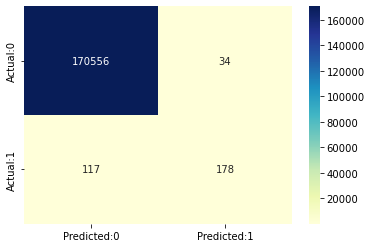

In [23]:
#Let's create a confusion matrix to see the amount of Type I and Type II errors in our Logistic Regression
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test_set,LR_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [24]:
#For further analysis we can create a correlation matrix and then eliminate variables...
corr_matrix = X_train_prep.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

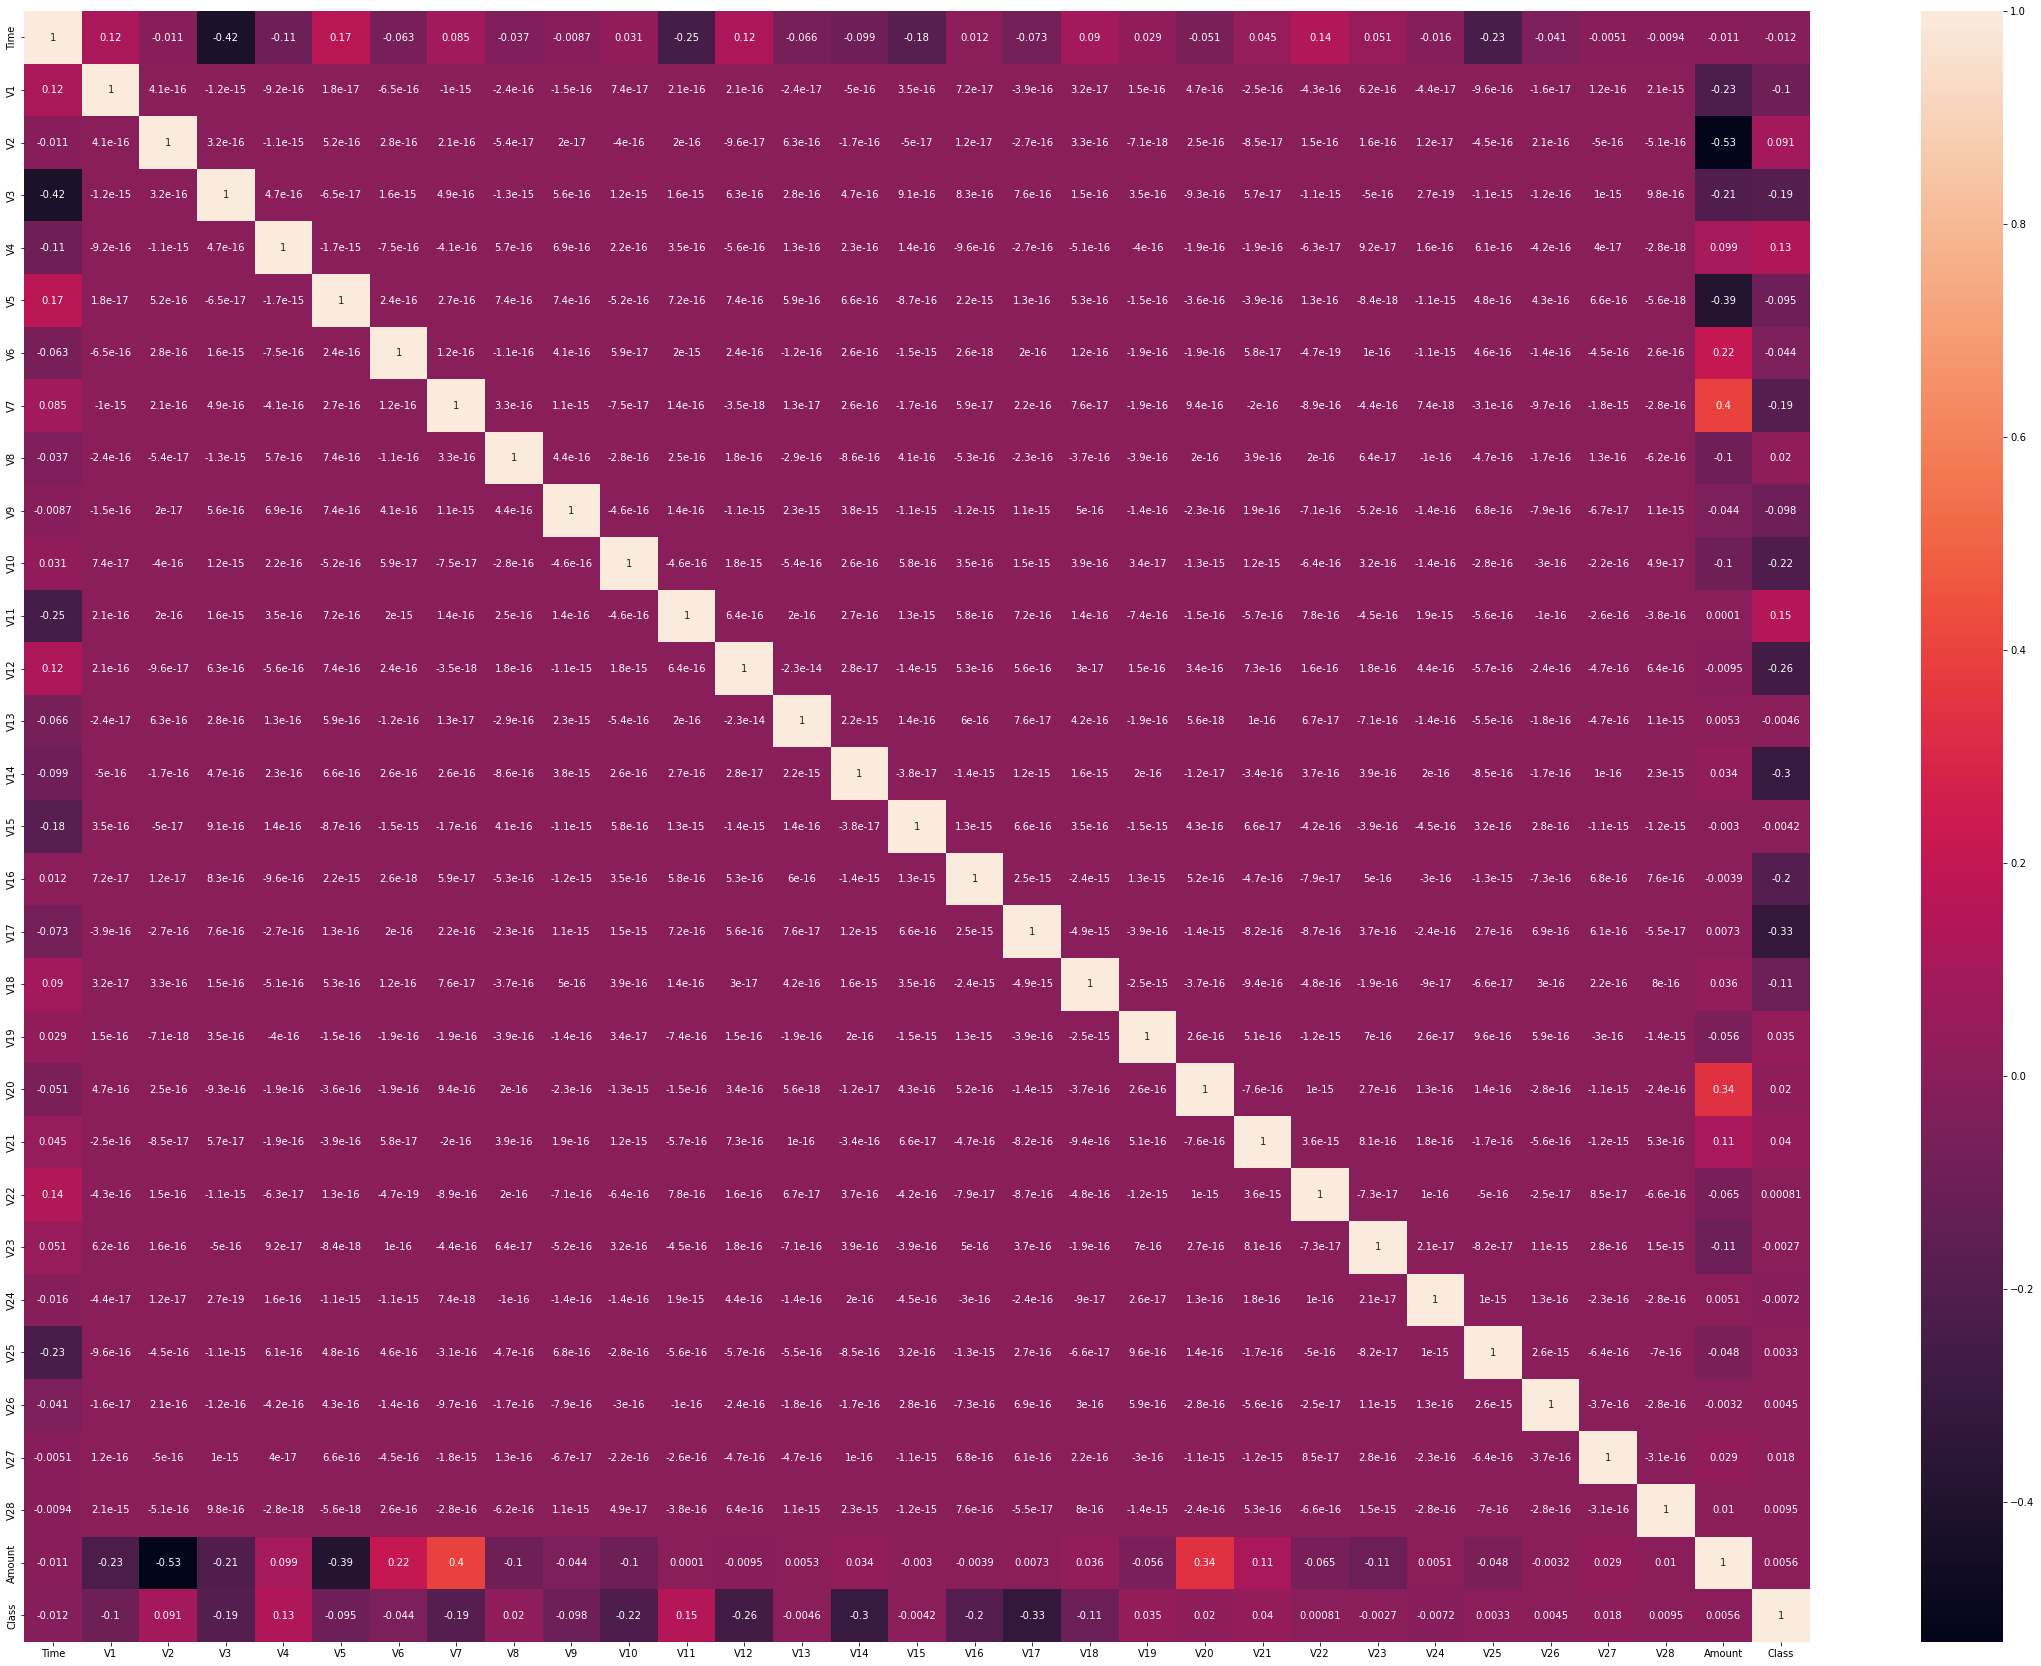

In [25]:
#Creating a heatmap (I recommend the seaborn heatmap for this)
plt.figure(figsize = (40,30))
sns.heatmap(corr_matrix, annot=True)
plt.show